In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trainData= pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
trainData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
trainData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
trainData.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C75D30CB38>]], dtype=object)

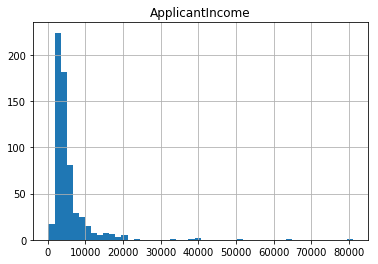

In [6]:
trainData.hist('ApplicantIncome',bins=50)

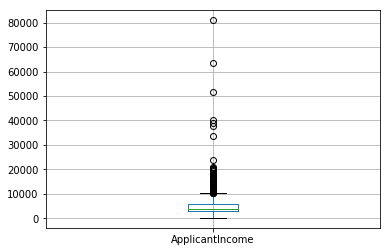

In [7]:
trainData.boxplot('ApplicantIncome')

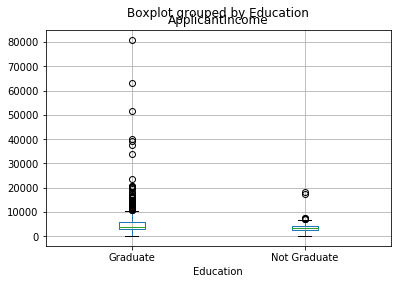

In [8]:
trainData.boxplot('ApplicantIncome', by='Education' )

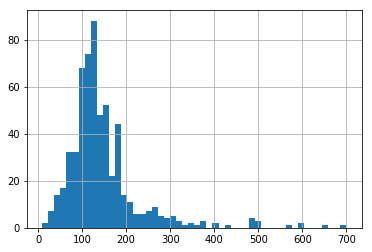

In [9]:
trainData['LoanAmount'].hist(bins=50)

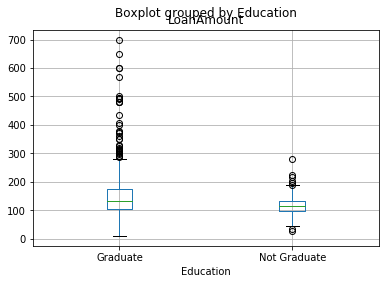

In [10]:
trainData.boxplot(column='LoanAmount', by = 'Education')

In [11]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [12]:
temp1= trainData['Credit_History'].value_counts()
temp1


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
trainData.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
trainData.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
temp2= trainData.pivot_table(values='Loan_Status', index='Credit_History', aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [24]:
#frequency of null values in each column
trainData.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [143]:
#trainData.LoanAmount.fillna(trainData.LoanAmount.mean(),inplace=True)

In [22]:
trainData.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [23]:
#fill all the null values on the Self_Employed column with 'No'
trainData.Self_Employed.fillna('No',inplace=True)

In [26]:
#pivot 'LoanAmount', index it on 'Self_Employed' and categorise the values on the 'Education' Column.
#use the median of the values
pTable= trainData.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
pTable

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [27]:
def fage(x):
    return pTable.loc[x['Self_Employed'],x['Education']]

In [30]:
trainData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
trainData['LoanAmount'].fillna(trainData[trainData['LoanAmount'].isnull()].apply(fage,axis=1),inplace=True)

In [31]:
trainData['log_loanAmount'] = np.log(trainData['LoanAmount'])

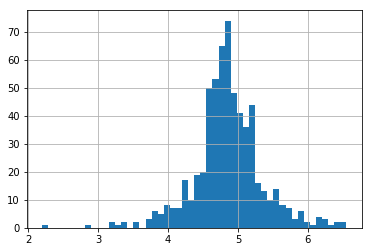

In [32]:
trainData.log_loanAmount.hist(bins=50)

In [33]:
trainData.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
log_loanAmount        0
dtype: int64

In [34]:
trainData['TotalIncome']= trainData['ApplicantIncome']+trainData['CoapplicantIncome']

In [35]:
trainData['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [36]:
#fillna with Male on the gender column
trainData['Gender'].fillna('Male', inplace=True)

In [37]:
trainData['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [38]:
#fillna with Yes on the marriage column
trainData['Married'].fillna('Yes', inplace=True)

In [39]:
trainData['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [40]:
#fillna with 0 on the Dependent column
trainData['Dependents'].fillna(0, inplace=True)

In [41]:
trainData['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [42]:
trainData.Loan_Amount_Term.fillna(np.mean, inplace=True)

In [43]:
trainData['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [44]:
trainData.Credit_History.fillna(1.0, inplace=True)

In [45]:
trainData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_loanAmount,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360,1.0,Urban,Y,4.867534,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1.0,Urban,Y,4.948760,6000.0


In [47]:
#frequency of null values in each column
trainData.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
log_loanAmount       0
TotalIncome          0
dtype: int64

In [48]:
trainData.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_loanAmount', 'TotalIncome'],
      dtype='object')

In [49]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [50]:
#assign the columns to a variable
var_mod= ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
#assign LabelEncoder to a variable
le= LabelEncoder()

In [51]:
#Create a for loop to iterate through the column variable so that the columns can be  fit_transformed
for c in var_mod:
    trainData[c] = le.fit_transform(trainData[c])
#Check the dtypes
trainData.dtypes
    

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History       float64
Property_Area          int64
Loan_Status            int64
log_loanAmount       float64
TotalIncome          float64
dtype: object

In [52]:
#check the head of the DataFrame
trainData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_loanAmount,TotalIncome
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360,1.0,2,1,4.867534,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360,1.0,0,0,4.852030,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360,1.0,2,1,4.189655,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360,1.0,2,1,4.787492,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360,1.0,2,1,4.948760,6000.0


In [53]:
#import models from skLearn modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [102]:
#Generic Function for making a classification model and accessing performance
def classification_model(model, data, predictor, outcome):
    #train the model:
    model.fit(data[predictor],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictor])
    
    #print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data):
    # Filter training data
        train_predictors = (data[predictor].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[predictor].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictor],data[outcome]) 
    

In [103]:
#building the logistic regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
data = trainData
classification_model(model, data, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [104]:
#combine different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, data, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%
